<a href="https://colab.research.google.com/github/rizkyfadlyy/MODEL-SUPERVISED-LEARNING-UNTUK-DETEKSI-AWAL-OSTEOPOROSIS/blob/main/Pengaruh_Pola_Hidup_terhadap_Klasifikasi_Osteoporosis_Menggunakan_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/amirmohammadparvizi/osteoporosis-risk-prediction-dataset

In [ ]:
!pip install xgboost
!pip install scikit-learn


# **EKSPLORASI DATA**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'osteoporosis.csv'
dataset = pd.read_csv(file_path)

# Eksplorasi dasar
print("Dimensi Dataset:", dataset.shape)
print("\nInformasi Dataset:\n")
print(dataset.info())
print("\nLima Baris Pertama Dataset:\n")
print(dataset.head())


Dimensi Dataset: (1958, 16)

Informasi Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteop

In [ ]:
# Cek missing values
missing_values = dataset.isnull().sum()
print("Jumlah Missing Values per Kolom:\n")
print(missing_values)

# Cek distribusi data untuk kolom dengan tipe data object (kategori)
print("\nNilai Unik pada Kolom Kategorikal:\n")
for column in dataset.select_dtypes(include=['object']).columns:
    print(f"{column}: {dataset[column].unique()}")

# Cek apakah ada nilai numerik yang tidak sesuai
print("\nDeskripsi Kolom Numerik:\n")
print(dataset.describe())


Jumlah Missing Values per Kolom:

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

Nilai Unik pada Kolom Kategorikal:

Gender: ['Female' 'Male']
Hormonal Changes: ['Normal' 'Postmenopausal']
Family History: ['Yes' 'No']
Race/Ethnicity: ['Asian' 'Caucasian' 'African American']
Body Weight: ['Underweight' 'Normal']
Calcium Intake: ['Low' 'Adequate']
Vitamin D Intake: ['Sufficient' 'Insufficient']
Physical Activity: ['Sedentary' 'Active']
Smoking: ['Yes' 'No']
Alcohol Consumption: ['Moderate' nan]
Medical Conditions: ['Rheumatoid Arthritis' nan 'Hyperthyroidism']
Medications: ['Corticosteroids' nan]

In [ ]:
# Menangani missing values
# Mengisi nilai hilang dengan "Unknown" atau mode
dataset['Alcohol Consumption'].fillna("Unknown", inplace=True)
dataset['Medical Conditions'].fillna("Unknown", inplace=True)
dataset['Medications'].fillna("Unknown", inplace=True)

# Verifikasi kembali missing values
print("Jumlah Missing Values Setelah Penanganan:\n")
print(dataset.isnull().sum())


Jumlah Missing Values Setelah Penanganan:

Id                     0
Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64


<ipython-input-4-06a8c2071da6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Alcohol Consumption'].fillna("Unknown", inplace=True)
<ipython-input-4-06a8c2071da6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

# **PRA-PEMROSESAN DATA**

Encoding Kategori Menjadi Numerik
Gunakan Label Encoding atau One-Hot Encoding untuk kolom kategorikal, bergantung pada jumlah kategori.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Buat salinan dataset untuk pra-pemrosesan
processed_dataset = dataset.copy()

# Kolom yang perlu encoding
categorical_columns = [
    'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
    'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
    'Physical Activity', 'Smoking', 'Alcohol Consumption',
    'Medical Conditions', 'Medications', 'Prior Fractures'
]

# Label encoding untuk kolom kategorikal
encoder = LabelEncoder()
for col in categorical_columns:
    processed_dataset[col] = encoder.fit_transform(processed_dataset[col])

print("Dataset setelah encoding:\n")
print(processed_dataset.head())


Dataset setelah encoding:

       Id  Age  Gender  Hormonal Changes  Family History  Race/Ethnicity  \
0  104866   69       0                 0               1               1   
1  101999   32       0                 0               1               1   
2  106567   89       0                 1               0               2   
3  102316   78       0                 0               0               2   
4  101944   38       1                 1               1               0   

   Body Weight  Calcium Intake  Vitamin D Intake  Physical Activity  Smoking  \
0            1               1                 1                  1        1   
1            1               1                 1                  1        0   
2            0               0                 1                  0        0   
3            1               0                 0                  1        1   
4            0               1                 1                  0        1   

   Alcohol Consumption  Medical Con

 Normalisasi/Standarisasi Fitur Numerik
 Normalisasi dilakukan untuk fitur numerik (Age) agar memiliki skala yang sama.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi kolom Age
scaler = MinMaxScaler()
processed_dataset['Age'] = scaler.fit_transform(processed_dataset[['Age']])

print("\nDataset setelah normalisasi Age:\n")
print(processed_dataset[['Age']].head())



Dataset setelah normalisasi Age:

        Age
0  0.708333
1  0.194444
2  0.986111
3  0.833333
4  0.277778


Penanganan Outlier
Identifikasi dan tangani outlier menggunakan metode seperti IQR untuk mendeteksi nilai ekstrim.

In [ ]:
# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Deteksi outlier pada kolom numerik (Age)
outliers_age = detect_outliers_iqr(processed_dataset, 'Age')
print("\nOutlier pada kolom Age:\n", outliers_age)

# Menghapus outlier (opsional)
processed_dataset = processed_dataset.drop(outliers_age.index)
print("\nDataset setelah menghapus outlier:\n", processed_dataset.shape)



Outlier pada kolom Age:
 Empty DataFrame
Columns: [Id, Age, Gender, Hormonal Changes, Family History, Race/Ethnicity, Body Weight, Calcium Intake, Vitamin D Intake, Physical Activity, Smoking, Alcohol Consumption, Medical Conditions, Medications, Prior Fractures, Osteoporosis]
Index: []

Dataset setelah menghapus outlier:
 (1958, 16)


# **OVERSAMPLING DATA (OPSIONAL)**

Cek Distribusi Target

Distribusi Target:
 Osteoporosis
1    979
0    979
Name: count, dtype: int64


<ipython-input-8-2d5f142b394b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Osteoporosis', data=processed_dataset, palette='pastel')


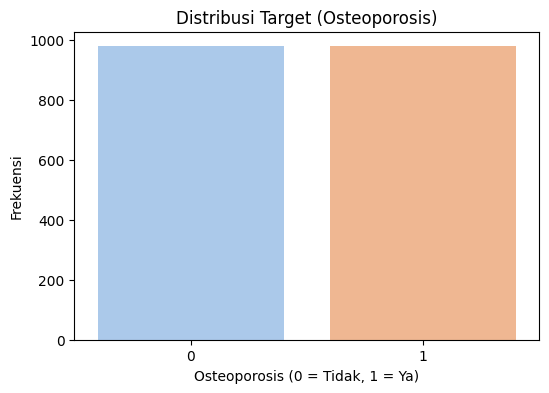

In [ ]:
# Cek distribusi target
target_distribution = processed_dataset['Osteoporosis'].value_counts()
print("Distribusi Target:\n", target_distribution)

# Visualisasi distribusi target
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Osteoporosis', data=processed_dataset, palette='pastel')
plt.title('Distribusi Target (Osteoporosis)')
plt.xlabel('Osteoporosis (0 = Tidak, 1 = Ya)')
plt.ylabel('Frekuensi')
plt.show()


Distribusi ini seimbang, karena jumlah kedua kelas sama besar. Oleh karena itu, SMOTE tidak diperlukan, dan Anda dapat langsung melanjutkan ke pelatihan model tanpa melakukan oversampling

# **Pembagian Dataset:**
# **Split data menjadi training dan testing (e.g., 80:20).**


In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = processed_dataset.drop(columns=['Id', 'Osteoporosis'])
y = processed_dataset['Osteoporosis']

# Split data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifikasi ukuran data setelah split
print("Ukuran Data Training (X_train, y_train):", X_train.shape, y_train.shape)
print("Ukuran Data Testing (X_test, y_test):", X_test.shape, y_test.shape)


Ukuran Data Training (X_train, y_train): (1566, 14) (1566,)
Ukuran Data Testing (X_test, y_test): (392, 14) (392,)


Dataset berhasil dibagi menjadi data training dan testing dengan ukuran berikut:

# **Training Model:**
Gunakan XGBoost untuk melatih model dengan parameter default atau yang dioptimalkan.

Gunakan data testing (X_test, y_test) untuk mengevaluasi performa model dengan metrik seperti akurasi, confusion matrix, dan classification report.

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = model.predict(X_test)

# Evaluasi model
print("\nAkurasi Model:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Akurasi Model: 0.8673469387755102

Confusion Matrix:
 [[175  18]
 [ 34 165]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       193
           1       0.90      0.83      0.86       199

    accuracy                           0.87       392
   macro avg       0.87      0.87      0.87       392
weighted avg       0.87      0.87      0.87       392



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:32:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# **Evaluasi Model:**


Gunakan metrik seperti akurasi, precision, recall, dan F1-score.

Untuk evaluasi model menggunakan metrik yang lebih detail seperti akurasi, precision, recall, dan F1-score, Anda dapat menggunakan fungsi classification_report dari sklearn.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi dengan metrik akurasi
accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi Model:", accuracy)

# Evaluasi dengan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Evaluasi dengan precision, recall, dan F1-score
class_report = classification_report(y_test, y_pred, target_names=['Tidak Osteoporosis', 'Osteoporosis'])
print("\nClassification Report:\n", class_report)



Akurasi Model: 0.8673469387755102

Confusion Matrix:
 [[175  18]
 [ 34 165]]

Classification Report:
                     precision    recall  f1-score   support

Tidak Osteoporosis       0.84      0.91      0.87       193
      Osteoporosis       0.90      0.83      0.86       199

          accuracy                           0.87       392
         macro avg       0.87      0.87      0.87       392
      weighted avg       0.87      0.87      0.87       392



# **Optimasi Model:**


Tuning hyperparameter menggunakan grid search atau random search.

Langkah 1: Import Library untuk Tuning
Gunakan GridSearchCV atau RandomizedSearchCV dari sklearn untuk melakukan pencarian hyperparameter terbaik.

In [ ]:
!pip install --upgrade xgboost scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 45.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    tree_method='hist',
    random_state=42
)


In [ ]:
# Contoh model dengan hyperparameter
model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    tree_method='hist',
    random_state=42
)

# Latih model
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:33:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Akurasi: 0.9030612244897959
Confusion Matrix:
 [[190   3]
 [ 35 164]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.91       193
           1       0.98      0.82      0.90       199

    accuracy                           0.90       392
   macro avg       0.91      0.90      0.90       392
weighted avg       0.91      0.90      0.90       392



# **Interpretasi:**

Analisis fitur yang paling berkontribusi.


Untuk menganalisis fitur yang paling berkontribusi dalam model XGBoost, kita dapat menggunakan feature importance. XGBoost menyediakan cara untuk menginterpretasi model dengan memberikan informasi tentang seberapa besar kontribusi masing-masing fitur terhadap prediksi.

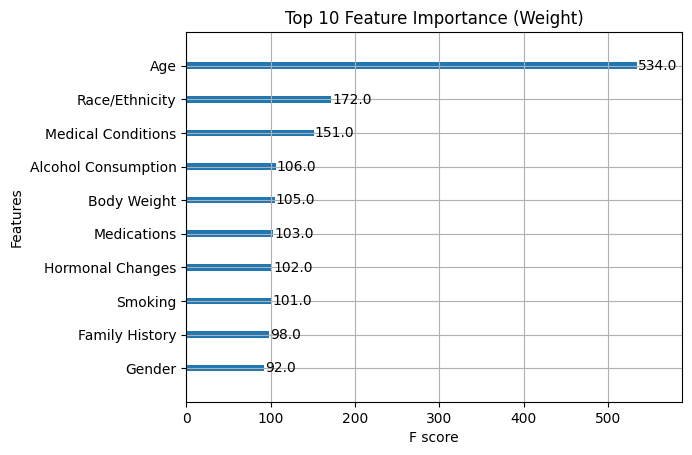

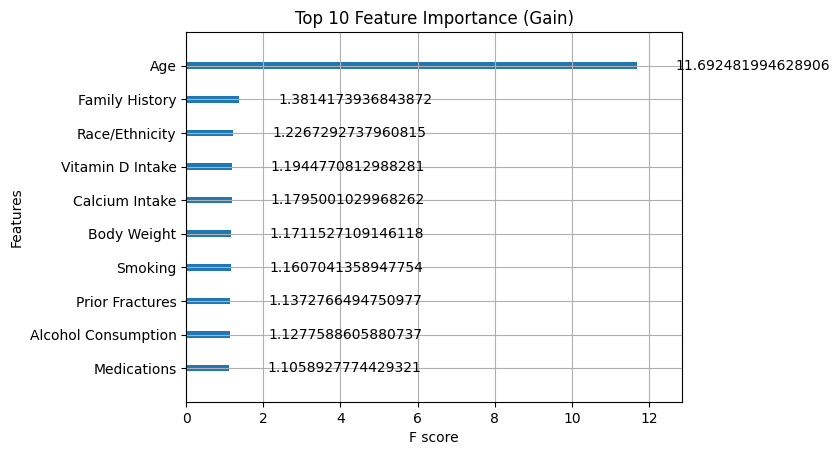

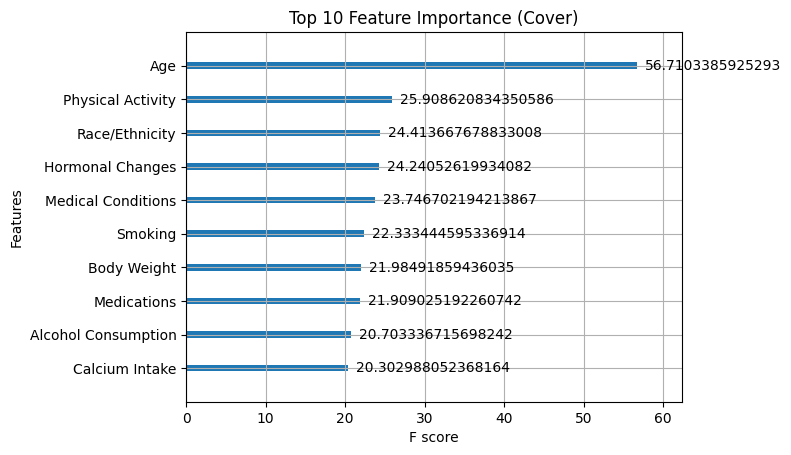

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.title('Top 10 Feature Importance (Weight)')
plt.show()

xgb.plot_importance(model, importance_type='gain', max_num_features=10)
plt.title('Top 10 Feature Importance (Gain)')
plt.show()

xgb.plot_importance(model, importance_type='cover', max_num_features=10)
plt.title('Top 10 Feature Importance (Cover)')
plt.show()


Keterangan tentang importance_type:

weight: Jumlah kali fitur digunakan dalam split.
gain: Rata-rata peningkatan performa model saat fitur digunakan dalam split.
cover: Rata-rata jumlah sampel yang dilibatkan dalam split dengan fitur tersebut.

**2. Manual Feature Importance Analysis**
Jika Anda ingin menyimpan nilai pentingnya fitur dalam bentuk tabel atau dataframe:

Top 10 Fitur Berdasarkan Gain:

                Feature  Importance (Gain)
0                   Age          11.692482
3        Family History           1.381417
4        Race/Ethnicity           1.226729
7      Vitamin D Intake           1.194477
6        Calcium Intake           1.179500
5           Body Weight           1.171153
9               Smoking           1.160704
13      Prior Fractures           1.137277
10  Alcohol Consumption           1.127759
12          Medications           1.105893


<Figure size 1000x600 with 0 Axes>

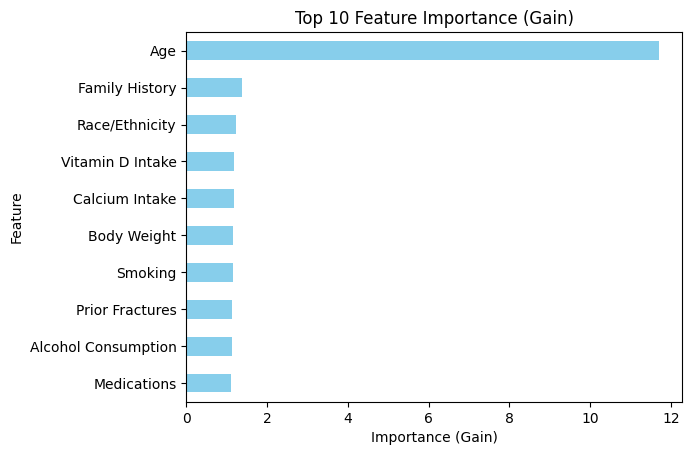

In [ ]:
# Konversi model ke format DMatrix
booster = model.get_booster()

# Ambil feature importance
feature_importance = booster.get_score(importance_type='gain')

# Convert ke dataframe untuk interpretasi
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': feature_importance.keys(),
    'Importance (Gain)': feature_importance.values()
}).sort_values(by='Importance (Gain)', ascending=False)

# Tampilkan 10 fitur teratas
print("Top 10 Fitur Berdasarkan Gain:\n")
print(importance_df.head(10))

# Visualisasi dalam bentuk bar plot
plt.figure(figsize=(10, 6))
importance_df.head(10).plot(kind='barh', x='Feature', y='Importance (Gain)', legend=False, color='skyblue')
plt.title('Top 10 Feature Importance (Gain)')
plt.gca().invert_yaxis()  # Membalik urutan fitur agar fitur terpenting berada di atas
plt.xlabel('Importance (Gain)')
plt.ylabel('Feature')
plt.show()


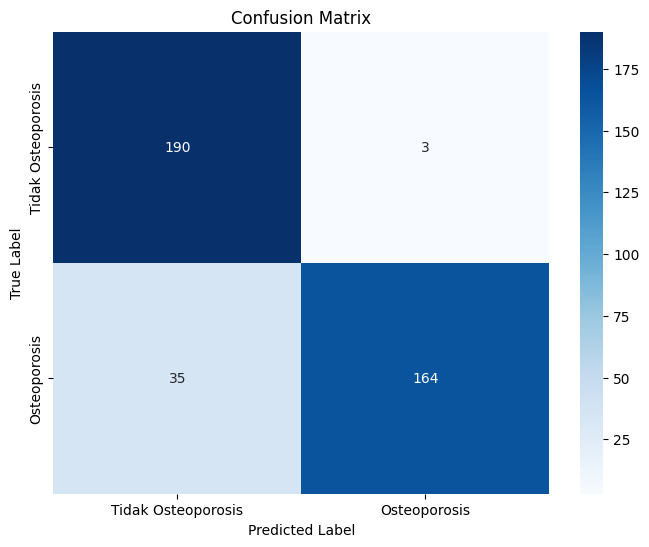

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Osteoporosis', 'Osteoporosis'], yticklabels=['Tidak Osteoporosis', 'Osteoporosis'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
